<a href="https://colab.research.google.com/github/angelotc/PieBacktester/blob/main/MyPie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run these two first!

In [2]:
from dataclasses import dataclass
import ipywidgets as widgets
import pandas_datareader as pdr
!pip install yfinance
import yfinance as yf
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
%matplotlib inline

     |████████████████████████████████| 5.5MB 11.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=dddbe487c2e0b5b4e54f0418fa7abafbebe9eba1a5ce302ff473909081fd5738
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [80]:
@dataclass
class Pie:
    """
    Takes in a dictionary of tickers, where the key is a ticker and the value is a weight of the portfolio. 
    Make sure that the weights equal to 1.0 for accurate backtesting. 
    """
    stocks: dict
    
    def backtest(self, start_date, end_date ):
        '''
        Takes in datetime date in string. 
        '''
        if sum(self.stocks.values()) > 1.0:
          raise Exception("Total weights should be <= 1.0")
        flag = False
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
        ax.tick_params(axis='x', colors='red'), ax.xaxis.label.set_color('red')
        ax.tick_params(axis='y', colors='red'), ax.yaxis.label.set_color('red')
        ax.set_ylabel('Percentage Returns')
        start_date = str(start_date.date())
        end_date = str(end_date.date())
        for ticker in self.stocks:
            data = yf.download(ticker , start = start_date , end = end_date,progress = False)
            # Cumulative Returns
            data['Daily_return']=data['Close']/data['Close'].shift(1)-1
            data[ticker] = np.cumsum(data['Daily_return']) 
            weight = self.stocks[ticker]
            data[ticker] *= weight * 100
            if flag == False:
              data = data.rename(columns={ticker: "Your fund"})
              chart = data["Your fund"][1:]
              flag = True
            else:
              chart += data[ticker][1:]
        str_fund_returns = str(round(chart[-1],2))
        print("Your fund had {}% returns during {} to {}.".format(str_fund_returns, start_date, end_date))
        chart.plot()
        plt.legend()
        plt.suptitle('Cumulative Returns', fontsize = 20, color = 'r')

###Example:

Your fund had 181.43% returns during 2018-04-24 to 2020-12-04.


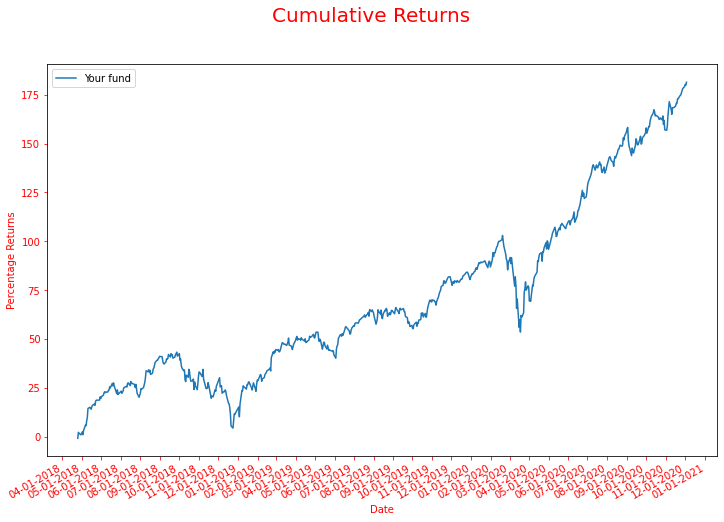

In [78]:
my_pie = Pie({"GOOG": 0.1, 
            "FB": 0.1, 
            "AAPL": 0.1, 
            "CRSP": 0.1, 
            "FB": 0.1, 
            "NVTA": 0.1, 
            "NVDA": 0.1, 
            "ROKU": 0.1, 
            "TSLA": 0.1, 
            "TTD": 0.1})

my_pie.backtest(dt.datetime(2018, 4, 24),  dt.datetime(2020, 12, 4))

Your fund had 284.92% returns during 2018-04-24 to 2020-12-04.


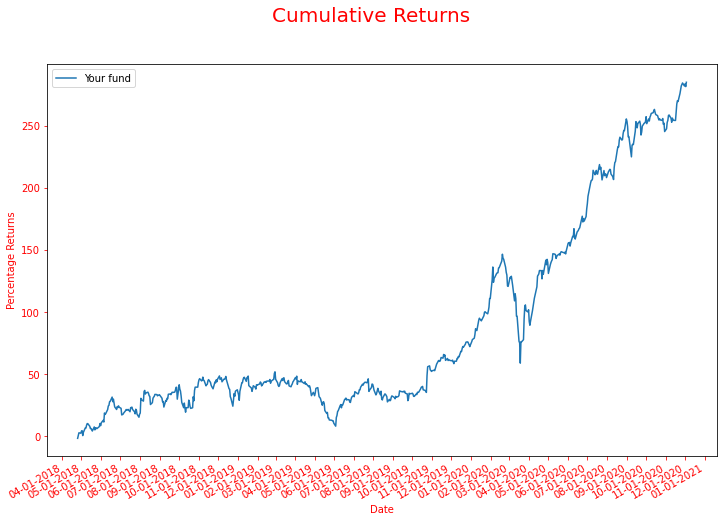

In [81]:
current_pie = Pie({"TSLA": 0.7,
                   "NVTA": 0.15,
                   "SQ": 0.15})
current_pie.backtest(dt.datetime(2018, 4, 24),  dt.datetime(2020, 12, 4))